<a href="https://colab.research.google.com/github/yasyamauchi/education/blob/main/2023AIreport1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 問題３：クラスタリング  

## 1)データを読み込む  

* country	国名
* child_mort	出生1000人あたりの5歳未満の子供の死亡数
* exports	人口当たり輸出額/GDP
* health	人口当たり医療費/GDP
* imports	人口当たり輸入額/GDP
* Income	人口当たり収入
* Inflation	経済成長率
* life_expec	平均寿命
* total_fer	平均出生数/女性
* gdpp	人口当たりGDP  

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_df = pd.read_csv('Country-data.csv')
data_df.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## 2) 医療費とGDPのデータだけ取り出して散布図にする  
なおGDPは1万で割る

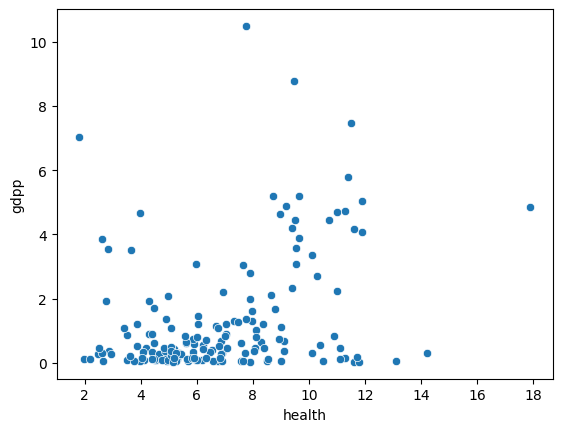

In [73]:
data_df=data_df.loc[:,["health","gdpp"]]
data_df.loc[:,"gdpp"]=data_df.loc[:,"gdpp"].apply(lambda x: x/10000) # 桁を近づける
ax = sns.scatterplot(x='health', y='gdpp', data=data_df)

## 3)【課題】次のコードから，クラスターの適切な数を求めよ

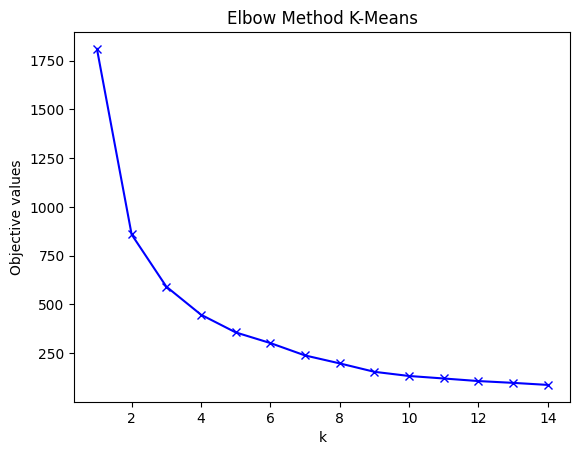

In [74]:
X = data_df.values
from sklearn.cluster import KMeans
objective_vals = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=0)
    km = km.fit(X)
    objective_vals.append(km.inertia_)
plt.plot(K, objective_vals, 'bx-')
plt.xlabel('k')
plt.ylabel('Objective values')
plt.title('Elbow Method K-Means')
plt.show()

## 4)クラスター当たりの国数を表示する  
このコードの最初の行の"n_clusters=?"の"?"に，先ほど決めたクラスターの数を記入して実行すること

In [75]:
pred = KMeans(n_clusters=?, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=0).fit_predict(X)
#data_df = pd.read_csv('Country-data.csv')
#data_df_=data_df.loc[:,["health","gdpp"]]
data_df_=data_df
data_df_['cluster']=pred
data_df_['cluster'].value_counts()

0    102
2     45
1     20
Name: cluster, dtype: int64

## 5)クラスター当たりの医療費支出とGDPの平均を求める

In [76]:
data_df_.groupby('cluster').mean()

,health,gdpp
cluster,,
0,5.016569,0.703242
1,10.555500,5.194500
2,9.231556,0.908460


##6)【課題】次のコードを実行し，クラスターを図示し，画面キャプチャでレポートに添付すること．

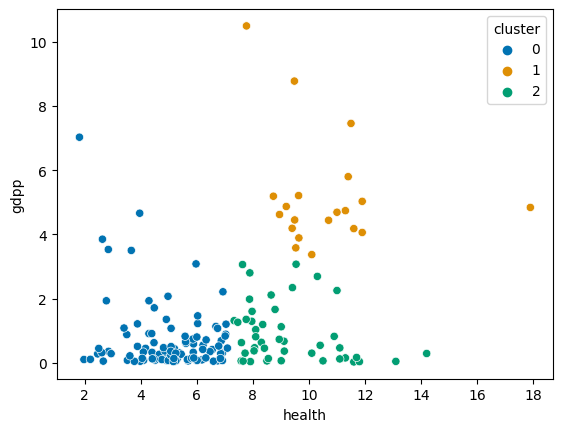

In [77]:
ax = sns.scatterplot(x='health', y='gdpp', hue='cluster',data=data_df_, palette='colorblind')